# Chapter 9. Chaos and Long Term Evolution
## Action by Santiago Herrera-Guzmán, University of Antioquia

In the following notebook we are going to study how the phenomenom called Chaos, influence complex systems as the 3 restricted body problem and see how sensible is the evolution of the system to the initial conditions. Then we will see why is important to take a look to chaotic systems because ...(aquí pondré otras cosas que aún no entiendo pero sé que son geniales sobre el Caos ajaja).

We will describe each equation, replicate the graphs and see some real life examples.

For details on the theory please refer directly to the book:

>Murray, C. D., & Dermott, S. F. (1999). Solar system dynamics. Cambridge university press.


In [1]:
#Installing Necessary libraries
#!pip install -q rebound

## 9.2 Sensitive Dependence to Initial Conditions


Consider a test particle in the vecinity of the planet Jupiter orbiting the Sun, making the aproximation to a planar circular restricted three-body problem (CRTBP). Let´s see how changing briefly the initial conditions of the test particle can influence of it´s orbit, by changing to a factor of only 0.3 in initial longitude ($l$).

We are going to simulate this system using _Rebound_ and then make an animation to apreciate the "butterfly effect" during one Jupiter period.  

In [3]:
#Importing necessary libraries
import rebound as rb
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
from matplotlib import animation, transforms

In [4]:
rad = np.pi/180
deg = 180/np.pi

In [5]:
# Creating Simulation
sim = rb.Simulation()

sim.units = ('au', 'msun', 'yr')

# Adding Objects
sim.add(m=1)   
sim.add(m=1/1047., a=5.2, e=0, inc=0, Omega=0, omega=0, l=0)
sim.add(m=0., a = 5.2*0.8, e=0.4, omega = 293*rad, theta = 293*rad)

In [6]:
# Configurings variable output.
ps = sim.particles

# Defining total time and number of points of the simulation.
tmax = ps[1].P   
Nout = 1000
times = np.linspace(0, tmax, Nout)

# Empty lists for particles trayectory.
x_jup = np.zeros(Nout)
y_jup = np.zeros(Nout)
x_part = np.zeros(Nout)
y_part = np.zeros(Nout)
x_sun = np.zeros(Nout)
y_sun = np.zeros(Nout)

for i,time in enumerate(times):
    sim.integrate(time)
    x_sun[i] = ps[0].x
    y_sun[i] = ps[0].y

    x_jup[i] = ps[1].x
    y_jup[i] = ps[1].y

    x_part[i] = ps[2].x
    y_part[i] = ps[2].y

We will use the same procedure to simulate again the modified test particle´s trayectory.

In [7]:
# Creating Simulation
sim = rb.Simulation()

sim.units = ('au', 'msun', 'yr')

# Adding Objects
sim.add(m=1)   
sim.add(m=1/1047., a=5.2, e=0, inc=0, Omega=0, omega=0, l=0)
sim.add(m=0., a = 5.2*0.8, e=0.4, omega = 293*rad, theta = 293.3*rad)

In [8]:
# Configurings variable output.
ps = sim.particles

# Defining total time and number of points of the simulation.
tmax = ps[1].P   
Nout = 1000
times = np.linspace(0,tmax,Nout)

# Empty lists for particles trayectory.
x_jup = np.zeros(Nout)
y_jup = np.zeros(Nout)

x_part2 = np.zeros(Nout)
y_part2 = np.zeros(Nout)

for i,time in enumerate(times):
    sim.integrate(time)

    x_part2[i] = ps[2].x
    y_part2[i] = ps[2].y

In [10]:
#Defining figure
fig,ax = plt.subplots(figsize = ((9,9)))
ts = np.linspace(0, 3, 1000)
plt.close(fig)

sun, = ax.plot([], [], '*', color = 'yellow', markevery=[-1], markersize = 13) 
jupiter, = ax.plot([], [], 'ro-', markevery=[-1])
test1, = ax.plot([], [], 'o-', markevery=[-1])  
test2, = ax.plot([], [], 'o-', markevery=[-1])

#Defining animating function
def pone_punto(it):
  sun.set_data(x_sun[0:it], y_sun[0:it])
  jupiter.set_data(x_jup[0:it], y_jup[0:it])
  test1.set_data(x_part[0:it], y_part[0:it])
  test2.set_data(x_part2[0:it], y_part2[0:it])
  ax.axis([-12, 12, -12, 12])
  ax.set_facecolor('black')
  plt.style.use('dark_background')
  return sun, jupiter, test1, test2

anim = animation.FuncAnimation(fig, pone_punto, frames=len(ts), interval=10)
HTML(anim.to_html5_video())

Now we are going to see another example of the chaotic behaviour of the CRTBP looking the evolution of the semi major axis of the test particle when we modify the initial conditions (see the book for a more detailing description).

In [17]:
# Creamos un objeto simulación
sim = rb.Simulation()

sim.units = ('au', 'msun', 'yr')

# Agregamos el Sol y Júpiter a la simulación
sim.add(m=1)   # El Sol
sim.add(m=1/1047., a=5.2, e=0, inc=0, Omega=0, omega=0, l=0)
sim.add(m=0., a=5.2 * 0.6984, e=0.1967, omega = 0*rad, theta = 0*rad)

In [18]:
# Configuramos la salida
ps = sim.particles

# Definimos el tiempo total de la simulación y el número de puntos en la salida
tmax = ps[1].P * 300
Nout = 1000

# Definimos los tiempos en los que se tomarán los datos de salida
times = np.linspace(0,tmax,Nout)

# Simulamos la órbita
x_jup = np.zeros(Nout)
y_jup = np.zeros(Nout)

a_test1 = np.zeros(Nout)
#y_test1 = np.zeros(Nout)

for i,time in enumerate(times):
    sim.integrate(time)

    a_test1[i] = ps[2].a

In [19]:
# Creamos un objeto simulación
sim = rb.Simulation()

sim.units = ('au', 'msun', 'yr')

# Agregamos el Sol y Júpiter a la simulación
sim.add(m=1)   # El Sol
sim.add(m=1/1047., a=5.2, e=0, inc=0, Omega=0, omega=0, l=0)
sim.add(m=0., a=5.2 * 0.6984, e=0.1967, omega = 0*rad, theta = 1e-6*rad)

In [20]:
# Configuramos la salida
ps = sim.particles

# Definimos el tiempo total de la simulación y el número de puntos en la salida
tmax = ps[1].P * 300
Nout = 1000

# Definimos los tiempos en los que se tomarán los datos de salida
times = np.linspace(0,tmax,Nout)

# Simulamos la órbita
x_jup = np.zeros(Nout)
y_jup = np.zeros(Nout)

a_test2 = np.zeros(Nout)
#y_test1 = np.zeros(Nout)

for i,time in enumerate(times):
    sim.integrate(time)

    a_test2[i] = ps[2].a

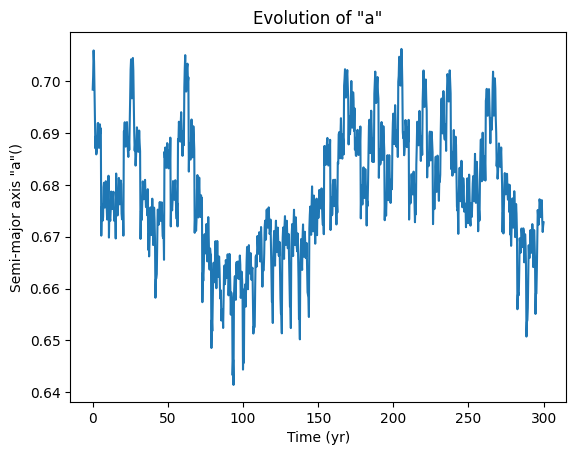

In [36]:
fig, ax = plt.subplots()
ax.plot(np.linspace(0,300,1000), a_test1/5.2)
ax.set_xlabel('Time (yr)')
ax.set_ylabel('Semi-major axis "a"()')
ax.set_title('Evolution of "a"')
plt.show()


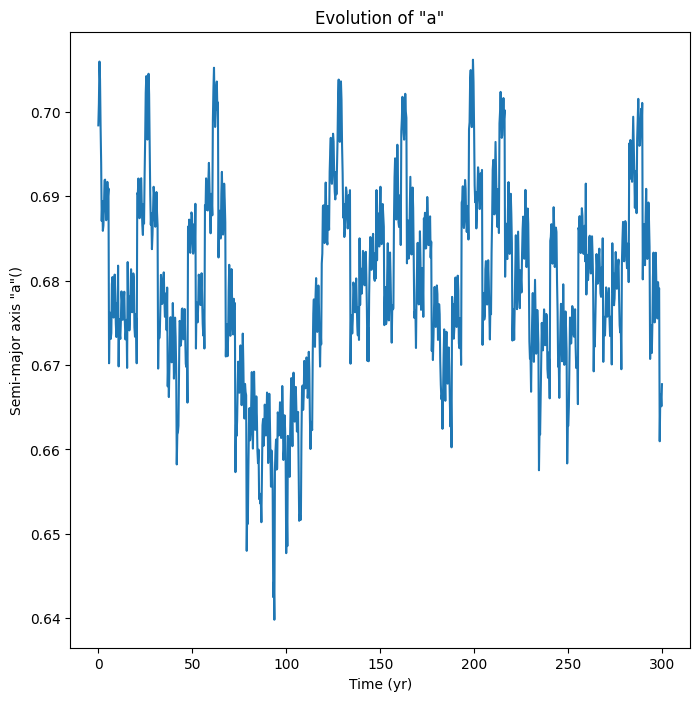

In [37]:
fig, ax = plt.subplots(figsize=(8,8))
plt.plot(np.linspace(0,300,1000),a_test2 /5.2)
ax.set_xlabel('Time (yr)')
ax.set_ylabel('Semi-major axis "a"()')
ax.set_title('Evolution of "a"')
plt.show()

As we can appreciate in the above figures, we see that the orbital evolution is exactly the same for 125 Juputer periods approximately, after which they start to differ.

## 9.3 Regular and Chaotic Problems

### 9.3.1 The Poincaré Surface of Section

In the CRTBP, the equations of motion are given by the following two, simultaneous, differential, nonlinear, second-order differential equations:
$$ \ddot{x} - 2n\dot{y} - n^2 x = \mu_1 \frac{x + \mu_2}{r^3_1} + \mu_2\frac{x + \mu_1}{r^3_2} $$ \
$$ \ddot{y} - 2n\dot{x} - n^2 y =  \frac{\mu_1}{r^3_1} + \frac{\mu_2}{r^3_2} y $$ \

Where $\mu_1 = m_1 / m_1 + m_2$, $\mu_2 = m_2 / m_1 + m_2$ and:
$$ r^2_1 = (x + \mu_2)^2 + y^2 $$\
$$ r^2_2 = (x + \mu_1)^2 + y^2 $$\

The solution consist of sets of values of $x$, $y$, $\dot{x}$ and $\dot{y}$, noticing that these are the position and velocity vectors in the rotating reference frame.
Now remembering the Jacobi constant, given by the following expression:
$$C_j = n^2 (x^2 + y^2) + 2\left( \frac{\mu_1}{r_1} + \frac{\mu_2}{r_2}\right) - \dot{x^2} - \dot{y^2} $$
We have that the trayectory of the particle if confined to a surface in the phase space